In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,MaxPool2D,Flatten,Conv2D
from keras.utils import to_categorical
from keras.datasets import mnist

## Load the data

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

## Scale the data

In [3]:
X_train = X_train/255
X_test = X_test/255

## Build the model

In [7]:
model = Sequential()

# First Convolutional Layer
model.add(Conv2D(filters=32,input_shape=(28,28,1),kernel_size=(3,3),activation='relu'))
# First Pooling Layer
model.add(MaxPool2D(pool_size=(2,2)))
# Second Convolutional Layer
model.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu'))
# Second Pooling Layer
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(256,activation='relu'))

model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))


In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 256)              

In [9]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [10]:
model.fit(X_train,y_train,epochs=10,batch_size=10)

Epoch 1/10


6000/6000 [==============================] - 36s 6ms/step - loss: 0.1233 - accuracy: 0.9622
Epoch 2/10
6000/6000 [==============================] - 34s 6ms/step - loss: 0.0476 - accuracy: 0.9853
Epoch 3/10
6000/6000 [==============================] - 34s 6ms/step - loss: 0.0349 - accuracy: 0.9894
Epoch 4/10
6000/6000 [==============================] - 34s 6ms/step - loss: 0.0290 - accuracy: 0.9915
Epoch 5/10
6000/6000 [==============================] - 34s 6ms/step - loss: 0.0230 - accuracy: 0.9931
Epoch 6/10
6000/6000 [==============================] - 34s 6ms/step - loss: 0.0213 - accuracy: 0.9937
Epoch 7/10
6000/6000 [==============================] - 34s 6ms/step - loss: 0.0165 - accuracy: 0.9952
Epoch 8/10
6000/6000 [==============================] - 34s 6ms/step - loss: 0.0166 - accuracy: 0.9951
Epoch 9/10
6000/6000 [==============================] - 34s 6ms/step - loss: 0.0141 - accuracy: 0.9959
Epoch 10/10
6000/6000 [==============================] - 34s 6ms/step -

In [11]:
model.evaluate(X_test, y_test, batch_size = 1)

10000/10000 [==============================] - 36s 4ms/step - loss: 0.0411 - accuracy: 0.9904


[0.04109344631433487, 0.9904000163078308]

In [12]:
new = X_test[2345]

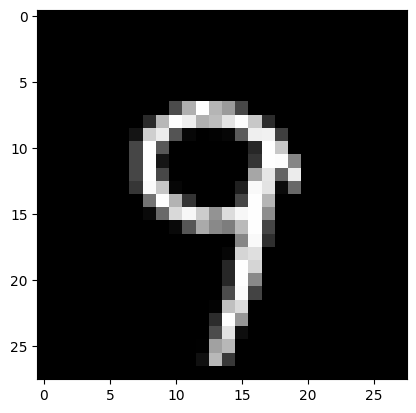

In [13]:
plt.imshow(new, cmap = 'gray')

In [18]:
mew = new / 255
new = new.reshape(1, 28, 28)
y = model.predict(new)
np.argmax(y)

1/1 [==============================] - 0s 45ms/step


1